Here we are trying to get some insights from a document having job descriptions.
our target is to mine top skils/keywords from document and represent it in a clear form.

In order to process text , we need to clean it and normalize it which is ready for analytics 
and further machine learning.

In [ ]:
#Lets first see how our data looks

In [ ]:
import pandas as pd
import numpy as np
import re

In [ ]:
data_set = pd.read_excel(r"job_desc.xlsx")

In [ ]:
data_set.head(5)

In [ ]:
data_set.info()

### info() is handy way to see if data has any null values or not ,luckily we dont have it.
   incase we have any null values then we must handle it first ; how to handle null value is a seperate discussion 
    depending upon quantity of such case and total data available data ,we can decide how to proceed

### lets remove some irrelevant chars 
    like <p> <u> as we say when we used head() on our data.
    So our data have some html tags ,which is not needed in our analysis.
##This is our Data Cleaning phase

In [ ]:
working_data = data_set  #always copy your data into a working data, where all manipulation will be done

In [ ]:
# A simple function to remove html tags from the passed string
def RemoveHTMLTags(strr):
     
    # Print string after removing tags
    return(re.compile(r'<[^>]+>').sub('', strr))

In [ ]:
#below step is not needed in our case ,
#but its a good practice to handle null values before converting them into strings.


In [ ]:
working_data["Job Description"] = working_data["Job Description"].fillna('').apply(str)
working_data["ID"] = working_data["ID"].fillna('').apply(str)


In [ ]:
working_data["Job Description"]  = working_data["Job Description"].apply(RemoveHTMLTags)

In [ ]:
working_data.head(5)

In [ ]:
##so data looks cleaner that its original form now

### Our Agenda is to mine key skills/keywords used in our dataset.
  To Accomplish this ,we can use wordCloud - which highlights most frequently used word with bigger size and color.
    
    however ,other approach would have been to load a dataset where all the technical keys skills is listed.
    and then we compare our data set with that dataset to figure out ,which skill is most demanded in our JDs.
    This approach is closed towards domain specific handling ,as dataset of key skills will be domain specific ;
    hence will not be applicavle to all dataset.
    
    

In [ ]:
#conda install wordcloud
#if wordcloud is not installed in your env

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [22]:
def splitText(text):
    return " ".join(text.split())

In [ ]:
#### We will use a handly NLTK library to process our data.

## Before proceeding ,lets first review some NLP concepts :
 - Tokenization -- we tokenize our data ,so that it is broken into words and then each word will be a seperate entity
    in its space.
    
 - Lemmatization -- this is used to link similar words to a root word.
    Eg.runs, running, ran are all forms of the word run, therefore run is the lemma of all these words.
    Because lemmatization returns an actual word of the language.
    
  - Stop words -- Whenever we are dealing with raw text ,we will have many words which can be removed
                  as they will not make any significance in the analysis , but they may degrade it as
                  they are very common and frequently used.
                  So ,we will use in built stopword library.
  - Punctuation removal - This is self explanatory. we will use regex to do this
                  

In [62]:
import nltk
import nltk.corpus
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import string

In [63]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer() 

In [39]:
##handle stop words
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amittiwa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [64]:
## A small sample of tokenization and stop words

In [68]:
txt = "if this . the The is - not working add . ;"
tok = word_tokenize(txt)
[word for word in tok if not word  in stop_words ]

['.', 'The', '-', 'working', 'add', '.', ';']

In [69]:
#Sample of punctuation removal

In [70]:

s = "the , punc ; ! removal - test & * . % ^ # @"
s.translate(str.maketrans('', '', string.punctuation))

'the  punc   removal  test       '

In [71]:
## Now we will write a function doing all this stuff ,so that our text can be normalized in one call.

In [72]:
def cleanCorpus(text):
    #print("########input text############")
    #print(text)
    
    #tokenization
    #print("########Tokenization############")
    token = word_tokenize(text.lower())
    #print(token)
    
    #lemetization 
    #print("########lemetization############")
    lemmatizer = WordNetLemmatizer() 
    lemmatized_text = [lemmatizer.lemmatize(word) for word in token]
    #print(lemmatized_text)
       
    
    
    #handling stop words 
    #print("########Stop words handling ############")
    stop_words = (stopwords.words('english'))
    stop_words.append('nbsp')
    stop_words.append('amp')
    stop_words_removed = [word for word in lemmatized_text if word not in stop_words ]
    #print(stop_words_removed)
    
    
    ##puncutation removal
    #print("########Punctuation removal############")
    punc_removed = str(stop_words_removed).translate(str.maketrans('', '', string.punctuation))
    #print(punc_removed)
        
    return punc_removed

In [77]:
## this wordcloud is based on the basis of text only and function returns top 10 frequently used word

def drawWordCloud(text):
    print(len(text))
    print(type(text))
    #print(text)
    word_cloud = WordCloud(collocations = False, background_color = 'white').generate((text))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    
    #return top 10 words
    collection = WordCloud().process_text(str(text))
    collection =sorted(collection.items(), key=lambda x: x[1],reverse=True)
    print(len(collection))
    return collection[:10]
    

In [92]:
## this wordcloud is based on the basis of word and its frequency
  #function returns top 10 frequently used word

def drawWordCloudWithFreq(text):
    print(len(text))
    #print(type(text))
    #print(text)
    word_cloud = WordCloud(collocations = False, background_color = 'white').generate_from_frequencies((text))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    
    #return top 10 words
    collection = WordCloud().process_text(str(text))
    #collection =sorted(collection.items(), key=lambda x: x[1],reverse=True)
    #print((collection))
    
    

In [89]:
def str_len(st):
    return( len(st.split()))

In [76]:
cleaned_cor = working_data["Job Description"].apply(cleanCorpus)
cleaned_cor.head(5)

0    within isg  gpu integral part centralized pric...
1    financial advisor safe act seasoned profession...
2    description  finance transformation   governan...
3    application development technology lead analys...
4    serf senior compliance risk officer independen...
Name: Job Description, dtype: object

In [53]:
#cleanCorpus(working_data["Job Description"][1])
cleaned_cor_str = ''.join(cleaned_cor)


In [54]:
#lets write this cleaned corpus into a csv file for future use.

In [55]:
cleaned_cor_df = pd.DataFrame(cleaned_cor,columns=["Job Description"])

cleaned_cor_df.to_csv("Cleaned_corpus_data_frame.csv", encoding = 'utf8',index=False)
cleaned_cor_df.head()

Job Description
0  within isg  gpu integral part centralized pric...
1  financial advisor safe act seasoned profession...
2  description  finance transformation   governan...
3  application development technology lead analys...
4  serf senior compliance risk officer independen...

In [56]:
cleaned_cor.to_csv("cleaned_corpus.txt" )

In [79]:
top10words = drawWordCloud(cleaned_cor_str)   #variant1

187434
<class 'str'>


4041


In [58]:
top10words    ## top10 words in the data

[('team', 123),
 ('experience', 106),
 ('process', 101),
 ('business', 99),
 ('technology', 89),
 ('data', 84),
 ('management', 78),
 ('including', 68),
 ('related', 64),
 ('knowledge', 59)]

In [84]:
#lets use variant 2 of wordcloud

3821


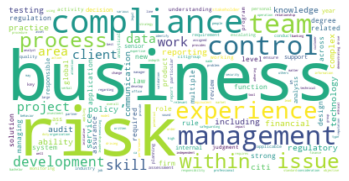

In [93]:
cleaned_tokens = word_tokenize(cleaned_cor_str) #tokenize the corpus
dist = FreqDist(cleaned_tokens )

dictionary = dict(dist)
#print(dist)
drawWordCloudWithFreq(dictionary)



In [ ]:
# in the 2nd variant  ,not need to derive top10 words as we passed a dictionary with
    #word count ,so we already knew the count in before hand

In [96]:
print(dist.most_common(10))    -- most common keywords/skills in our data set

[('business', 286), ('risk', 279), ('compliance', 236), ('management', 176), ('team', 172), ('control', 167), ('experience', 157), ('process', 137), ('issue', 136), ('within', 131)]
